In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline  

In [2]:
def run_models(csv_name, model, feature_threshold, model_alpha, verbose = True):
    '''
    This function runs ridge and lasso regression on given data.
    
    Parameters:
        csv_name: takes a string. The name of csv file that contains clean data
        model: takes a string. 'Ridge' or 'Lasso'
        feature_threshold: takes a list. The list of thresholds that user want to try for feature selection
        model_alpha: takes a list. The list of alpha values for ridge and lasso regression
        verbose: Boolean. Whether to print result. 
        
    Return: None    
    '''
    
    # import the dataset
    clean_df = pd.read_csv('data/'+csv_name+'.csv')

    # select needed columns.
    features = [c for c in clean_df.columns if c not in ['salary','jobId']]

    # Fit regression model
    global_best_score = 0
    global_best_mse=0
    alpha_of_global_best_score = 0
    thres_of_best_score = 0
    threshold_list = feature_threshold
    plot_df = pd.DataFrame()
    plot_list_test=[]

    for thres in threshold_list:

        # select needed features
        select_feature_model = VarianceThreshold(threshold = thres)
        selected_feature_df = pd.DataFrame(select_feature_model.fit_transform(clean_df[features]))

        # split data set into 70% train set, 20% validation set and 10% test set
        selected_feature_lable_df = pd.concat([selected_feature_df, clean_df["salary"]], axis = 1)
        train_data, validate_data, test_data = np.split(selected_feature_lable_df.sample(frac=1), [int(0.7 * len(selected_feature_lable_df)), int(0.9 * len(selected_feature_lable_df))])

        features_after_selection = list(selected_feature_df.columns)
        train_data_features = train_data[features_after_selection]
        train_data_labels = train_data['salary']

        validate_data_features = validate_data[features_after_selection]
        validate_data_labels = validate_data['salary']

        test_data_features = test_data[features_after_selection]
        test_data_labels = test_data['salary']

        local_best_score = 0
        alpha_of_local_best_score = 0
        best_model = None
        alphas_list = model_alpha

        plot_list_train=[]
        for each_alpha in alphas_list:
            
            if model.casefold() == 'Ridge'.casefold():
                temp_model = linear_model.Ridge(alpha = each_alpha)
            
            elif model.casefold() == 'Lasso'.casefold():
                temp_model = linear_model.Ridge(alpha = each_alpha)

            temp_model.fit(train_data_features, train_data_labels) 

            #get R-squared score using validation data set
            result = temp_model.predict(validate_data_features)

            r2_score_validate_set = r2_score(validate_data_labels, result)

            plot_list_train.append(r2_score_validate_set)

            # update best depth for current num_of_component
            if r2_score_validate_set > local_best_score:
                local_best_score = r2_score_validate_set
                best_model = temp_model
                alpha_of_local_best_score = each_alpha

        # plot the r2 score of the validation set
        plot_each_df = pd.DataFrame({thres: plot_list_train}) 
        plot_df = pd.concat([plot_df, plot_each_df], axis = 1)

        # predict using test data set
        result = best_model.predict(test_data_features)
        r2_score_test_data = r2_score(test_data_labels, result)
        mean_squared_error_test_data = mean_squared_error(test_data_labels, result)

        if verbose:
            print("Threshold: ", thres)
            print('mean squared error on test data set is: ', mean_squared_error_test_data)
            print("R2 score on test data set is: ",r2_score_test_data)   
            print("\n\n\n")

        plot_list_test.append(r2_score_test_data)    

        # update best alpha and best threshold of feature selection
        if r2_score_test_data > global_best_score:
            global_best_mse = mean_squared_error_test_data
            global_best_score = r2_score_test_data
            alpha_of_global_best_score = alpha_of_local_best_score
            thres_of_best_score = thres
            
    #visualize the results.
    plot_df.index = alphas_list
    plot_df.plot(marker='o', title='R-squared of combinaiton alpha('+ model+' Regression) & threshold(feature selection) on validation data')
    plt.show()
    print('\n\n')
    
    fig, ax = plt.subplots()
    ax.plot(threshold_list, plot_list_test, marker='o') 
    ax.set_xlabel('threshold')
    ax.set_ylabel('R-squared')
    ax.set_title('R-squared for each threshold on test dataset')
    plt.show()
    
    print("Best r2 score on test data set is: ",global_best_score, "with alpha: ", alpha_of_global_best_score, " with threshold of feature selection: ", thres_of_best_score, "with mean square error: ", global_best_mse)


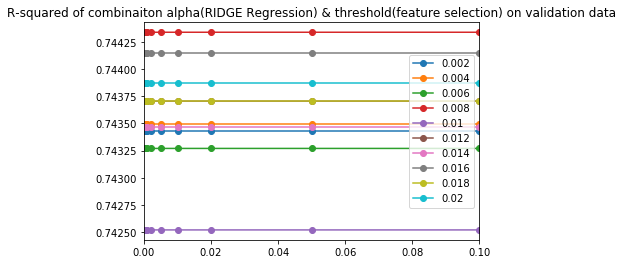

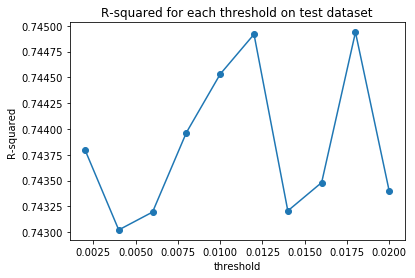

Best r2 score on test data set is:  0.744937210596 with alpha:  0.0001  with threshold of feature selection:  0.018 with mean square error:  383.413954035


In [3]:
feature_threshold = [0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
model_alpha = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

run_models('convert_columns_clean_data', 'RIDGE', feature_threshold, model_alpha, verbose = False)

Threshold:  0.002
mean squared error on test data set is:  383.540537583
R2 score on test data set is:  0.744407593823




Threshold:  0.004
mean squared error on test data set is:  385.016291578
R2 score on test data set is:  0.74266320387




Threshold:  0.006
mean squared error on test data set is:  384.806850998
R2 score on test data set is:  0.742606797534




Threshold:  0.008
mean squared error on test data set is:  383.649909876
R2 score on test data set is:  0.744329171345




Threshold:  0.01
mean squared error on test data set is:  385.78455585
R2 score on test data set is:  0.741231001714




Threshold:  0.012
mean squared error on test data set is:  386.487982794
R2 score on test data set is:  0.744247125017




Threshold:  0.014
mean squared error on test data set is:  385.916369277
R2 score on test data set is:  0.74325042591




Threshold:  0.016
mean squared error on test data set is:  383.857751003
R2 score on test data set is:  0.742281797138




Threshold:  0.018
me

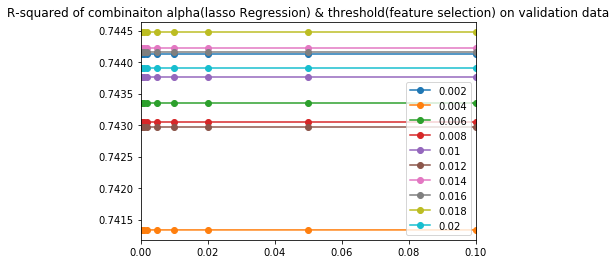

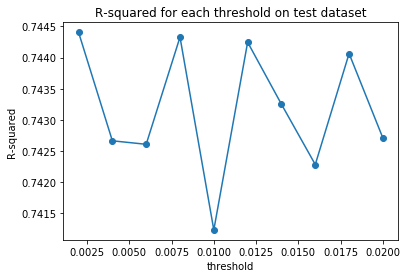

Best r2 score on test data set is:  0.744407593823 with alpha:  0.0001  with threshold of feature selection:  0.002 with mean square error:  383.540537583


In [4]:
feature_threshold = [0.002, 0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]
model_alpha = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]

run_models('convert_columns_clean_data', 'lasso', feature_threshold, model_alpha, verbose = True)